In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
result_tket = pd.read_csv('./result_uccsd_tket.csv')
result_paulihedral = pd.read_csv('./result_uccsd_paulihedral.csv')
result_tetris = pd.read_csv('./result_uccsd_tetris.csv')
result_phoenix = pd.read_csv('./result_uccsd_phoenix.csv')


In [72]:
num_programs = len(result_tket)
programs = result_tket['program']
num_2q_gates = result_tket['num_2q_gates']
depth_2q = result_tket['depth_2q']

In [73]:
result_phoenix

,program,num_qubits,num_gates,num_2q_gates,depth,depth_2q,num_gates(all2all),num_2q_gates(all2all),depth(all2all),depth_2q(all2all),num_gates(manhattan),num_2q_gates(manhattan),depth(manhattan),depth_2q(manhattan),num_gates(sycamore),num_2q_gates(sycamore),depth(sycamore),depth_2q(sycamore)
0,CH2_cmplt_BK,14,37780,19574,23568,19399,8498,3870,5563,3253,19635,12717,11773,8812,14583,8813,9173,6527
1,CH2_cmplt_JW,14,34280,21072,23700,19749,8371,3680,5296,3040,18504,11045,11022,7973,14902,8458,9185,6321
2,CH2_frz_BK,12,19880,10228,12559,10174,4607,2102,3058,1804,9963,6238,6211,4565,7601,4496,4873,3434
3,CH2_frz_JW,12,17658,10344,11914,9706,4595,1987,2958,1683,9641,5597,5885,4196,7827,4330,4862,3282
4,H2O_cmplt_BK,14,25238,13108,15797,12976,5847,2664,3799,2239,12944,8337,7769,5832,9857,5925,6354,4506
5,H2O_cmplt_JW,14,23210,14360,16264,13576,5678,2520,3678,2116,12831,7698,8029,5789,10110,5880,6392,4429
6,H2O_frz_BK,12,15624,8004,9691,7934,3183,1371,2026,1143,6351,3776,4045,2904,5051,2899,3220,2254
7,H2O_frz_JW,12,13704,8064,9332,7613,3577,1555,2322,1319,7730,4549,4979,3585,6155,3439,4033,2759
8,LiH_cmplt_BK,12,16762,8680,10509,8637,3240,1414,2181,1218,6475,3875,4159,2971,5059,2844,3384,2294
9,LiH_cmplt_JW,12,13700,8064,9342,7616,3566,1532,2302,1305,7296,4159,4466,3141,6027,3265,3811,2544


### All2all topology

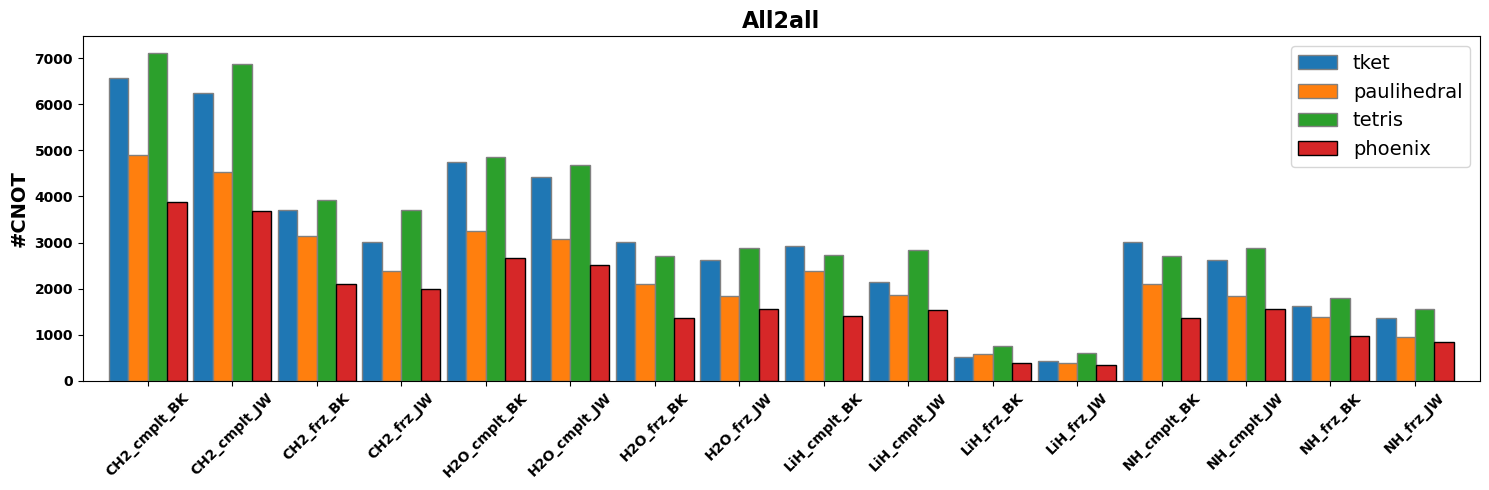

In [74]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(all2all)'], width=width, label='tket', edgecolor='gray')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(all2all)'], width=width, label='paulihedral', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(all2all)'], width=width, label='tetris', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(all2all)'], width=width, label='phoenix', edgecolor='black')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('All2all', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

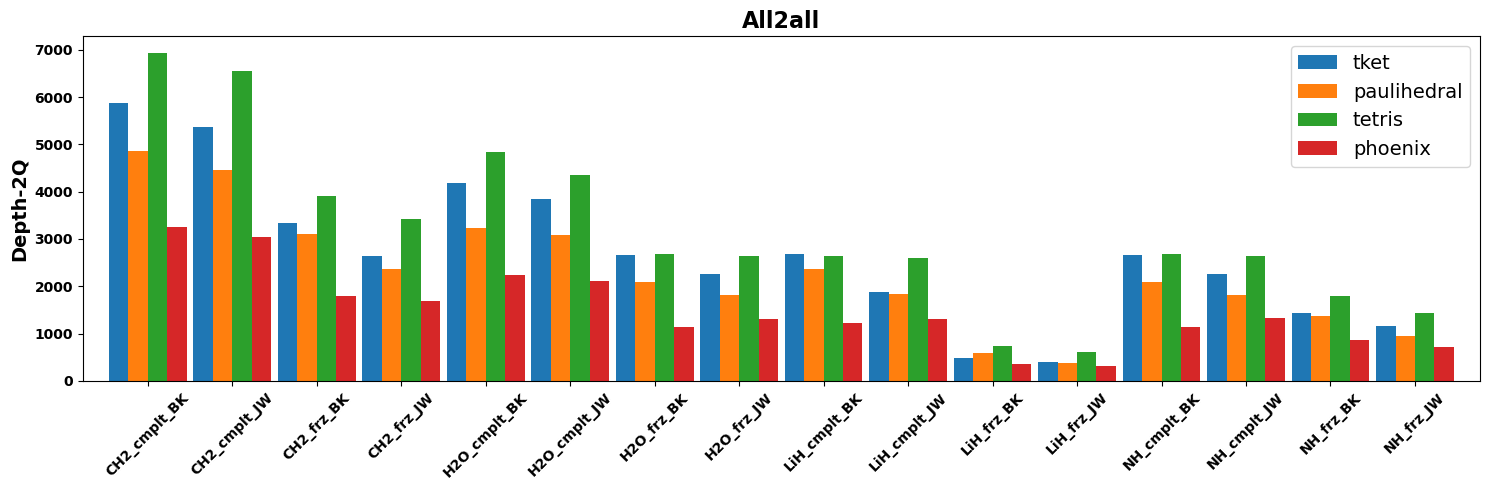

In [75]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(all2all)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(all2all)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(all2all)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(all2all)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('All2all', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Manhattan

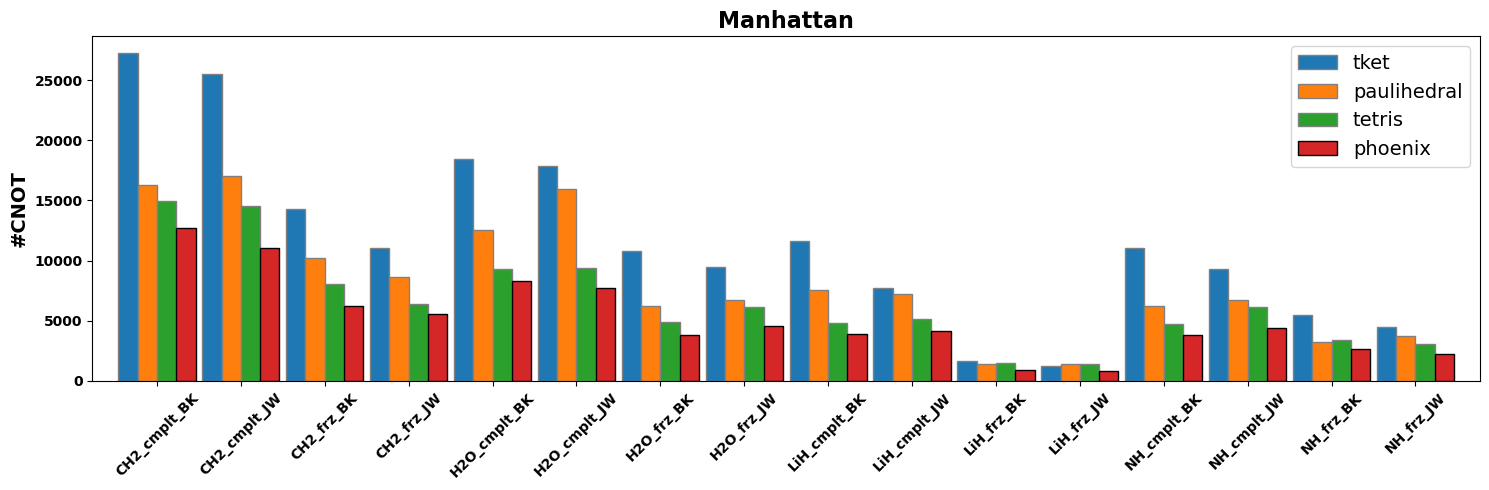

In [76]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(manhattan)'], width=width, label='tket', edgecolor='gray')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(manhattan)'], width=width, label='paulihedral', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(manhattan)'], width=width, label='tetris', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(manhattan)'], width=width, label='phoenix', edgecolor='black')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Manhattan', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

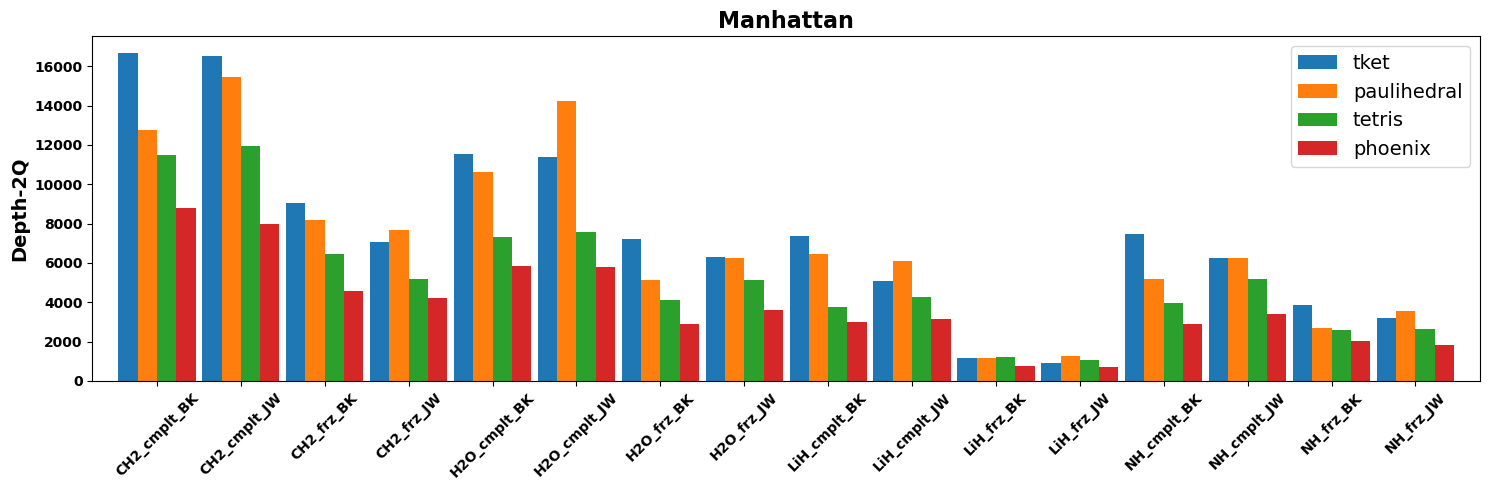

In [77]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(manhattan)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(manhattan)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(manhattan)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(manhattan)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Manhattan', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Sycamore

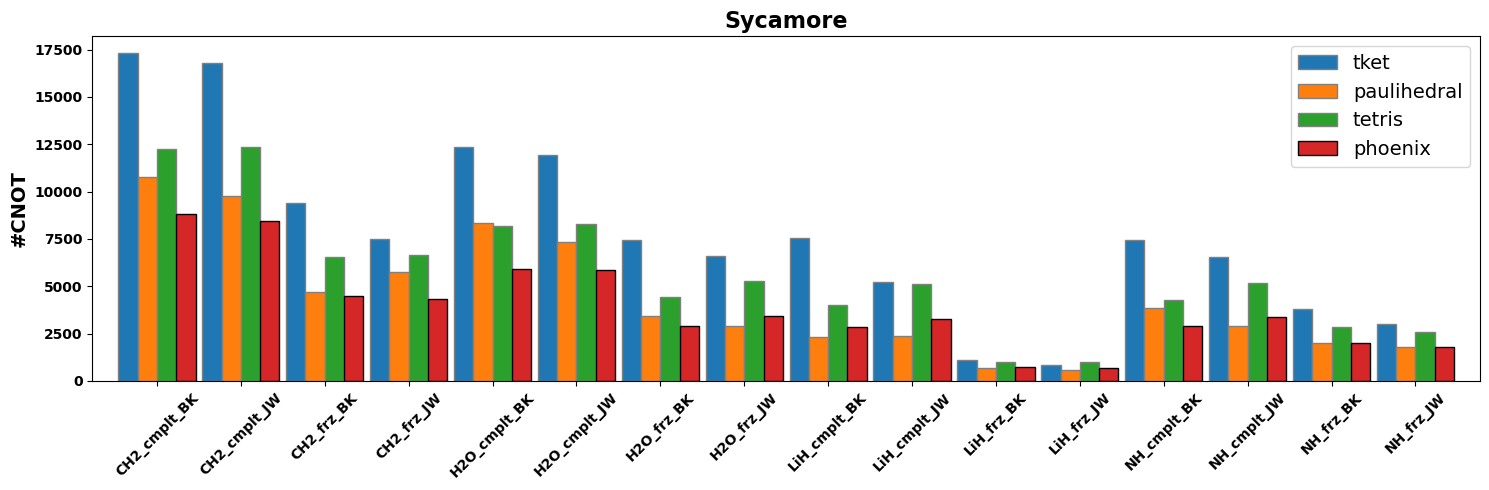

In [78]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(sycamore)'], width=width, label='tket', edgecolor='gray')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(sycamore)'], width=width, label='paulihedral', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(sycamore)'], width=width, label='tetris', edgecolor='gray')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(sycamore)'], width=width, label='phoenix', edgecolor='black')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

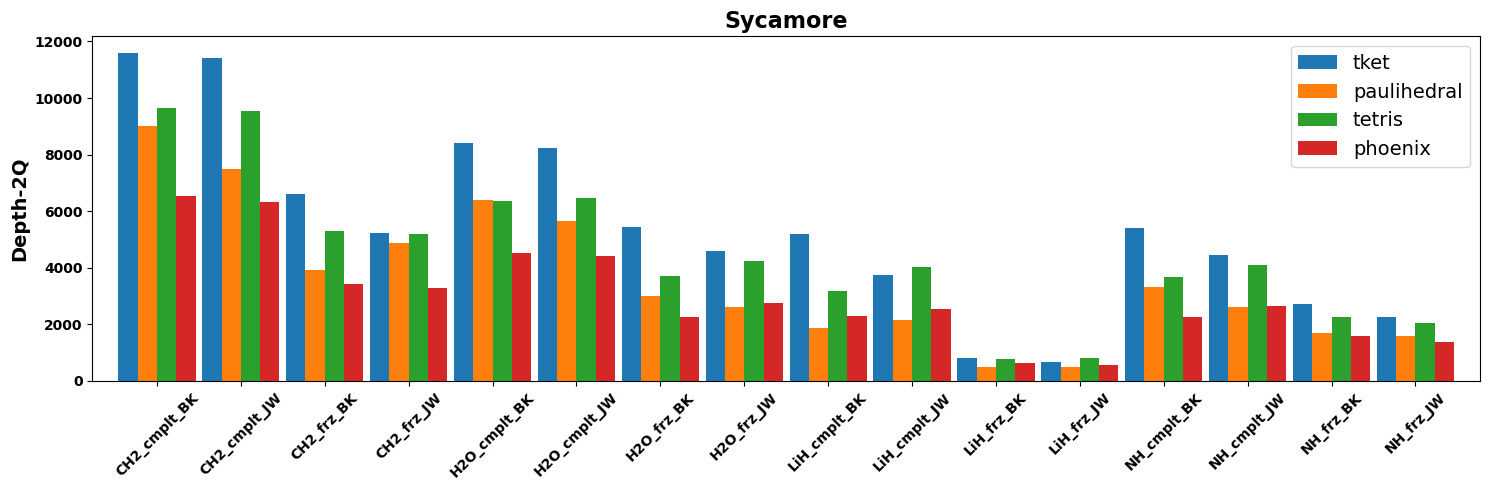

In [79]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(sycamore)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(sycamore)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(sycamore)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(sycamore)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [93]:
result_tetris['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64

In [94]:
['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64